<b> Forest Fire </b>

<font color=red> <b> Business Problem: </font> <br>
    <b>Classify the Size_Categorie using SVM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("forestfires.csv")
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84
dayfri,517.0,0.164410,0.371006,0.0,0.0,0.00,0.00,1.00


In [5]:
df[df.columns[0:11]].describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84


In [6]:
corr = df[df.columns[0:11]].corr()

<AxesSubplot:>

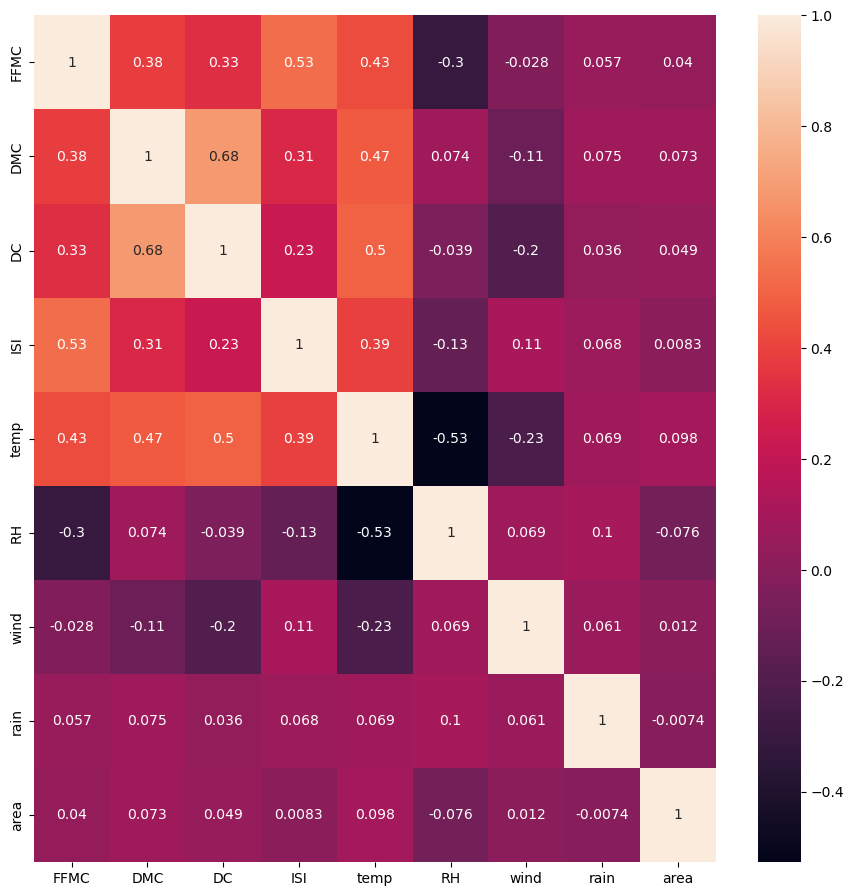

In [7]:
plt.figure(figsize=(11,11))
sns.heatmap(corr, annot=True)

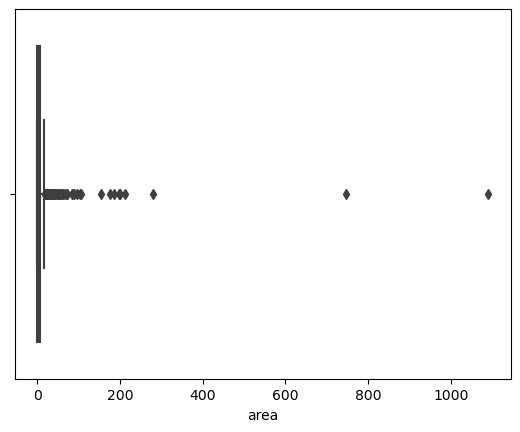

In [8]:
area_outlier = sns.boxplot(df['area'])

In [9]:
df[df.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


Data Visualization: 

Skewness:  12.75393973327039
Kurtosis:  191.2657222312397


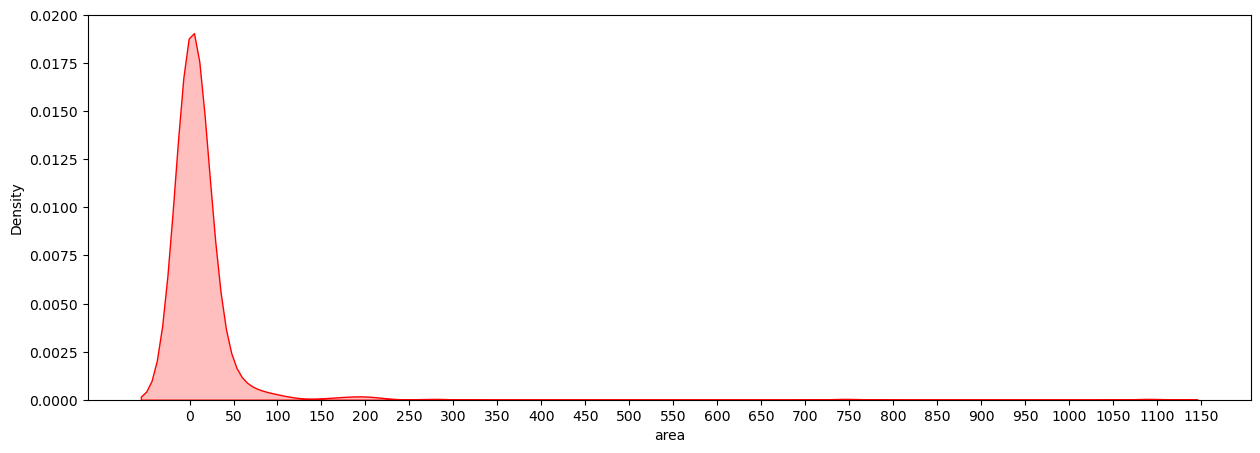

In [12]:
plt.figure(figsize=(15,5))
print("Skewness: ", df['area'].skew())
print("Kurtosis: ", df['area'].kurt())

plot = sns.kdeplot(df['area'], shade=True, color='r')
plt.xticks([i for i in range(0,1200, 50)])
plt.show()

Here we can see that the data is highly skewed and has large kurtosis value. <br>
<br> Majority of the forest fires are not covering a large area, most of the damages areas are under 100 hectares of land.

In [13]:
dfa = df[df.columns[0:10]]
month_columns = dfa.select_dtypes(include='object').columns.tolist()

In [14]:
dfa

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0
...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0


In [15]:
month_columns

['month', 'day']

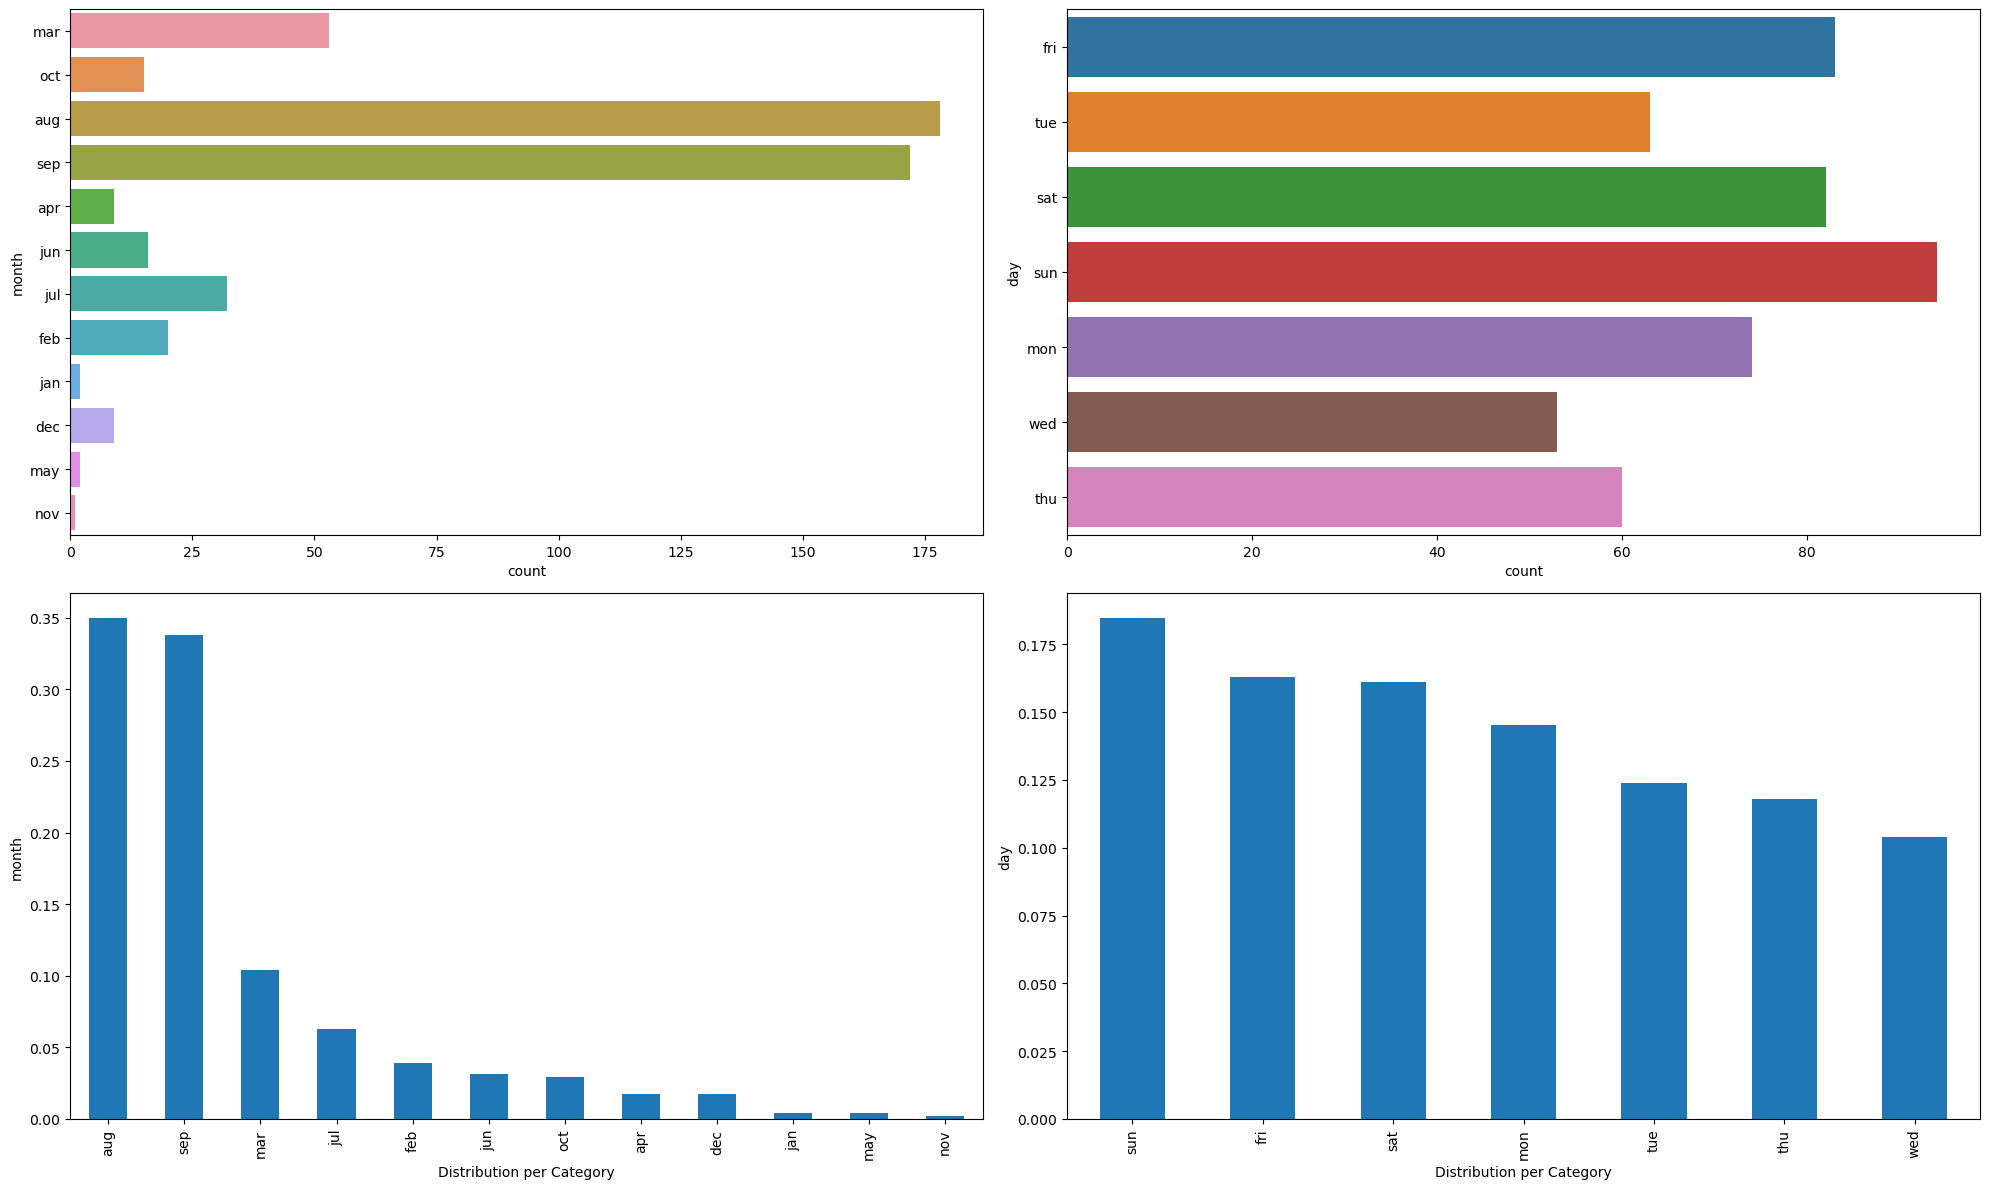

In [16]:
plt.figure(figsize=(20,12))
for i, col in enumerate(month_columns, 1):
    plt.subplot(2,2,i)
    sns.countplot(data=dfa, y=col)
    plt.subplot(2,2, i+2)
    df[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel("Distribution per Category")
    
plt.tight_layout()
plt.show()

Mojority of Fires occured in the month of August and September. <br>
<br> Sunday and Friday are recorded as most cases.

In [17]:
num_col = df.select_dtypes(exclude='object').columns.tolist()

In [28]:
num_col

['FFMC',
 'DMC',
 'DC',
 'ISI',
 'temp',
 'RH',
 'wind',
 'rain',
 'area',
 'dayfri',
 'daymon',
 'daysat',
 'daysun',
 'daythu',
 'daytue',
 'daywed',
 'monthapr',
 'monthaug',
 'monthdec',
 'monthfeb',
 'monthjan',
 'monthjul',
 'monthjun',
 'monthmar',
 'monthmay',
 'monthnov',
 'monthoct',
 'monthsep']

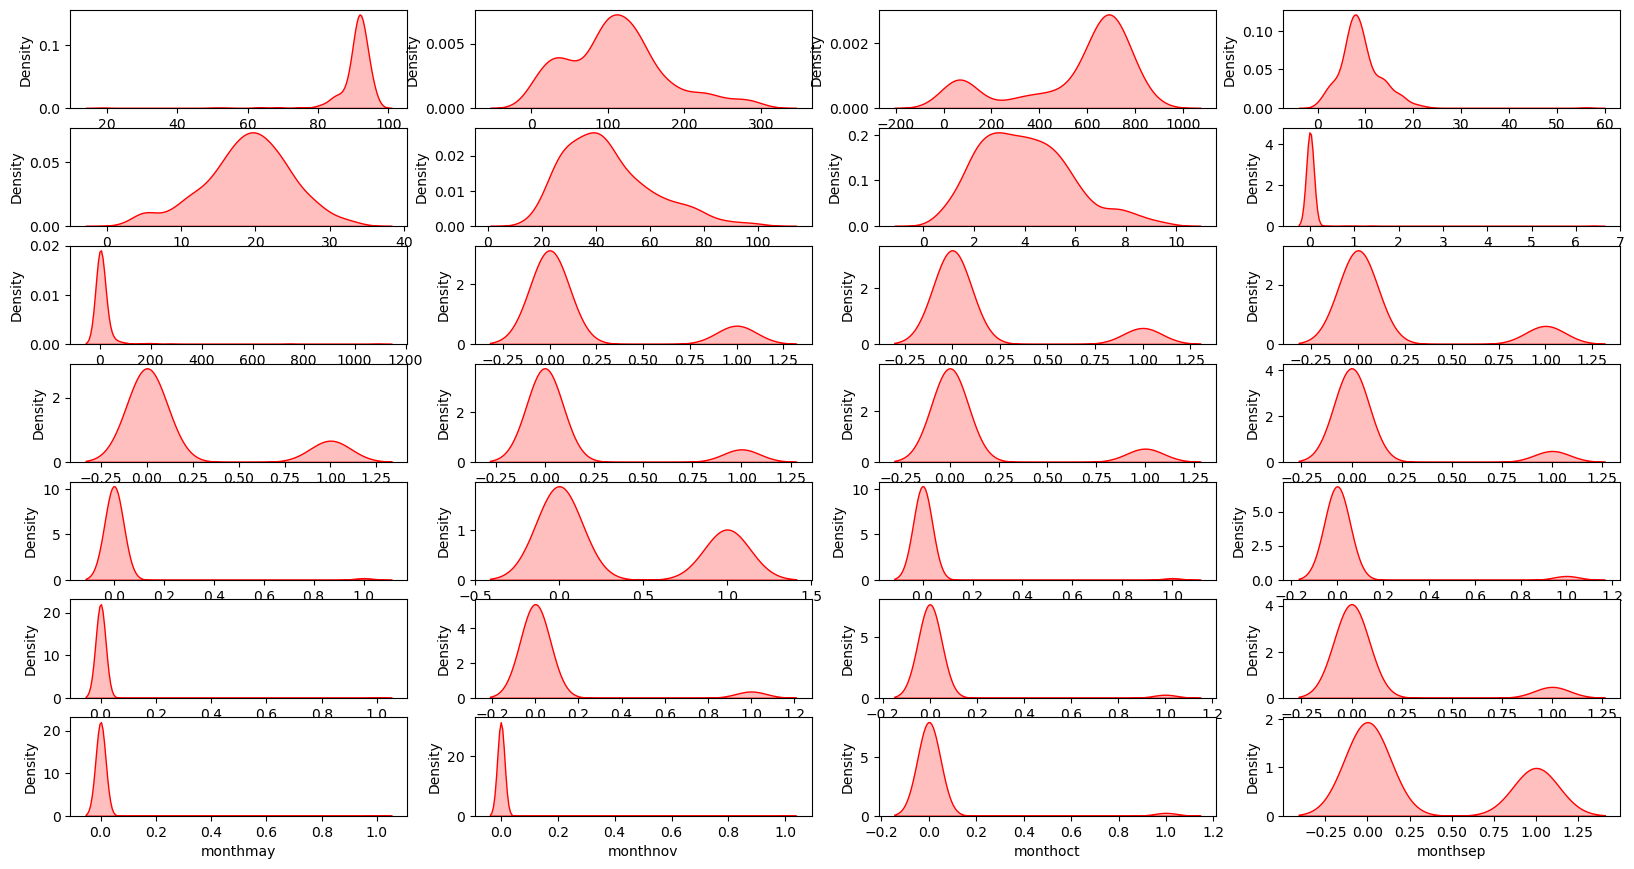

In [29]:
plt.figure(figsize=(20,12))
for i, col in enumerate(num_col,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col], color='r', shade=True)
    #plt.subplot(8,4,i+10)
    #df[col].plot.box()
    
plt.show()



In [30]:
num_data = df[num_col]
pd.DataFrame(data=[num_data.skew(), num_data.kurt()], index=['skewness', 'kurtosis'])

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
skewness,-6.540474,0.558596,-1.100245,2.529891,-0.321869,0.869644,0.581689,20.044822,12.753940,1.829503,...,7.341047,4.756486,15.905788,3.612506,5.386637,2.599965,15.905788,22.561028,5.580964,0.687365
kurtosis,66.255682,0.251618,-0.242656,21.288771,0.101560,0.447242,0.043986,426.542289,191.265722,1.352379,...,52.095660,20.705500,251.984198,11.093778,27.122416,4.778578,251.984198,509.000000,29.262120,-1.533570


In [33]:
df1.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [34]:
df1 = df.iloc[:, 0:11]
data = pd.concat([df1, df['size_category']], axis=1)

In [35]:
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [36]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


Numerical Features: 

In [37]:
num_features=[i for i in df.columns if df[i].dtypes != 'O']

print('Number of numerical variables:', len(num_features))

df[num_features].head()

Number of numerical variables: 28


,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,0,1,0,0,0,0


Discrete Features: 

In [38]:
dis_features = [i for i in num_features if len(df[i].unique())<25]

print("Number of descrete variables: ", len(dis_features))

Number of descrete variables:  21


In [39]:
discrete_feature=[feature for feature in num_features if len(df[feature].unique())<25]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))

Discrete Variables Count: 21


In [40]:
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


Feature Engineering: 

Label Encoding

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['month'] = le.fit_transform(df['month'])
data['day'] = le.fit_transform(df['day'])
data['size_category'] = le.fit_transform(data['size_category'])

In [42]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


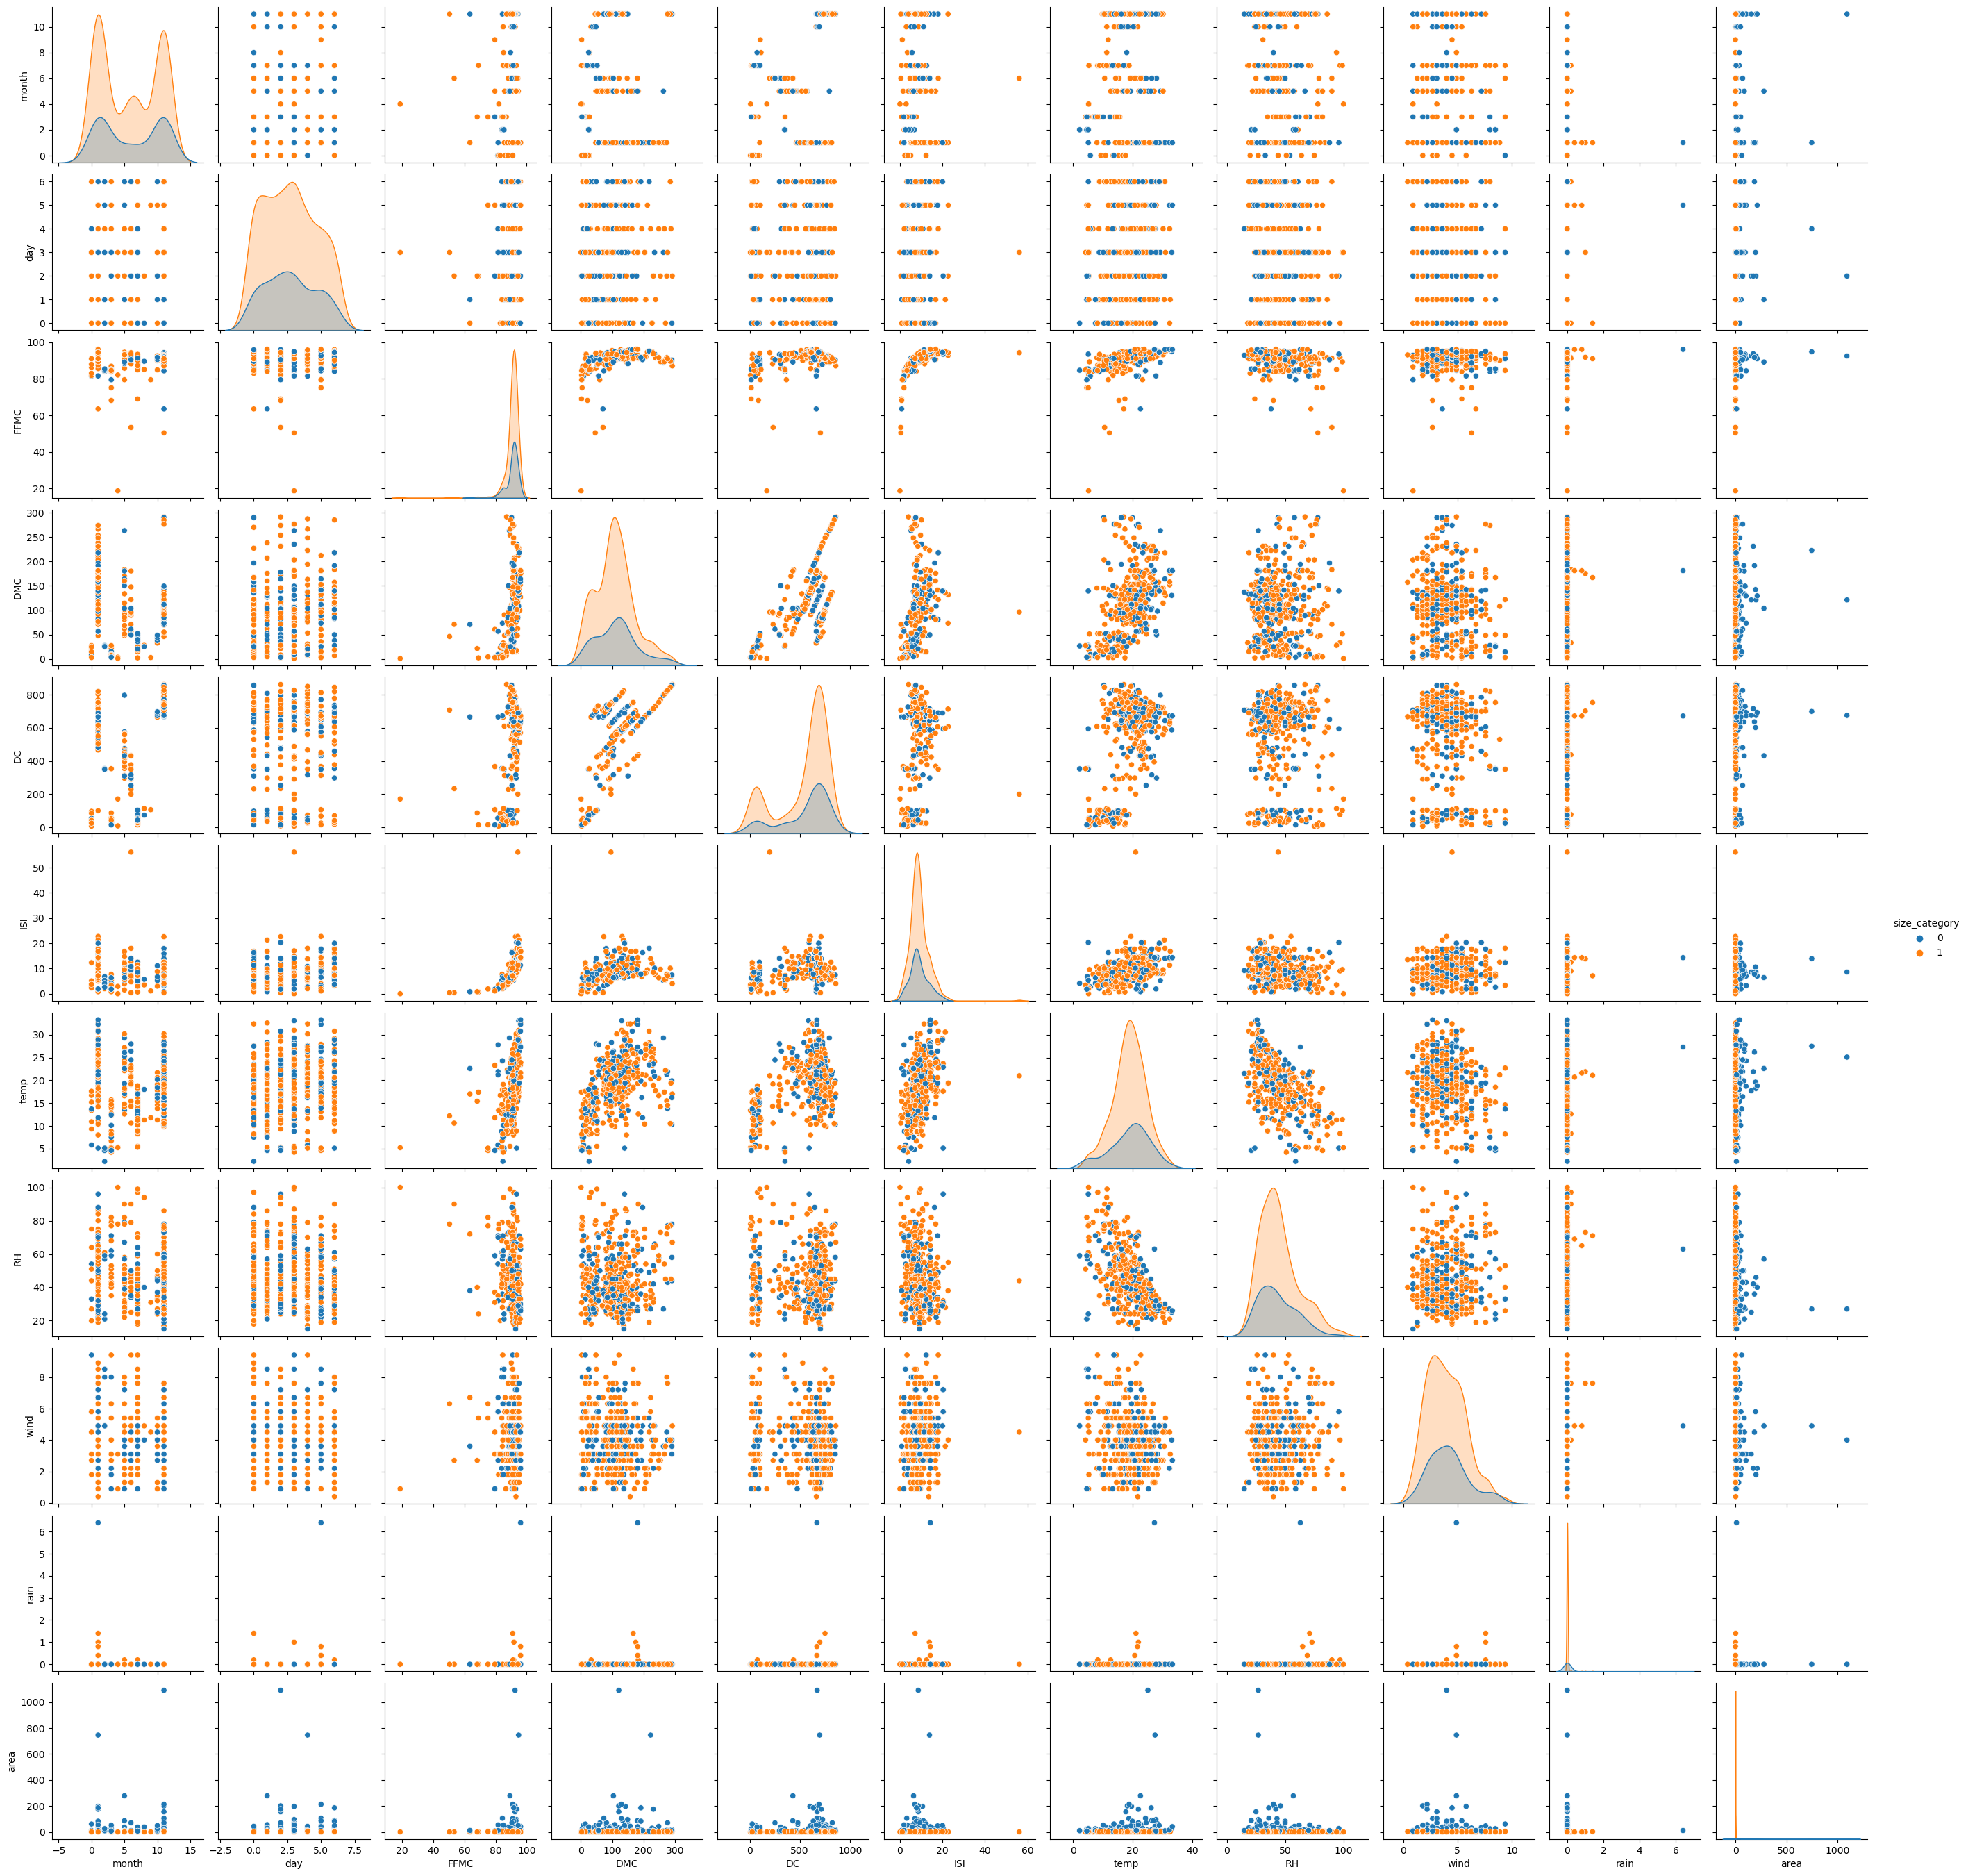

In [43]:
sns.pairplot(data, hue='size_category')

<AxesSubplot:>

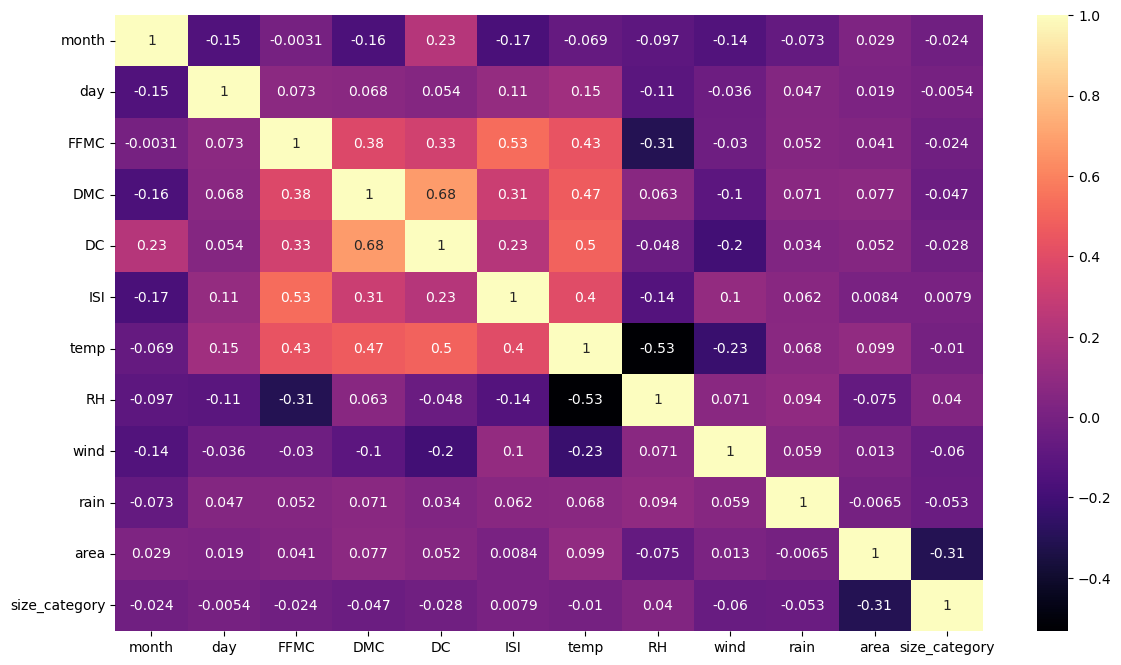

In [44]:
plt.figure(figsize=(14,8))
sns.heatmap(data.corr(), cmap='magma', annot=True)

<b>Model Development: </b> 

In [45]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [46]:
x = data.iloc[:,0:11]
y = data.iloc[:,-1]

In [47]:
x.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [48]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: size_category, dtype: int32

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25)

In [50]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((381, 11), (128, 11), (381,), (128,))

Grid Search CV

In [51]:
clf = SVC()

parameters = {'kernel':['rbf'],
             'gamma':[100, 75, 50, 45, 22, 5, 0.5, 0.1, 0.01, 0.001],
             'C':[50,35,15,12,10,6,5,0.1,0.001]}

gsv = GridSearchCV(clf, param_grid=parameters, cv=10)

gsv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [50, 35, 15, 12, 10, 6, 5, 0.1, 0.001],
                         'gamma': [100, 75, 50, 45, 22, 5, 0.5, 0.1, 0.01,
                                   0.001],
                         'kernel': ['rbf']})

In [52]:
gsv.best_params_

{'C': 50, 'gamma': 0.001, 'kernel': 'rbf'}

In [53]:
gsv.best_score_

0.8529689608636977

In [54]:
model = SVC(C=50, gamma = 0.0001)
model.fit(x_train, y_train)

SVC(C=50, gamma=0.0001)

In [55]:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0])

In [56]:
acc = accuracy_score(y_test, y_pred)
print('Accuracy: ', acc)

Accuracy:  0.9453125


In [57]:
confusion_matrix(y_test, y_pred)

array([[28,  6],
       [ 1, 93]], dtype=int64)

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89        34
           1       0.94      0.99      0.96        94

    accuracy                           0.95       128
   macro avg       0.95      0.91      0.93       128
weighted avg       0.95      0.95      0.94       128



Another Approach: 

In [59]:
from sklearn.decomposition import PCA

Linear: 

In [60]:
model_linear = SVC(kernel='linear')
model_linear.fit(x_train, y_train)
pred_test_linear = model_linear.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, pred_test_linear))

Accuracy:  0.9921875


Poly: 

In [61]:
model_poly = SVC(kernel='poly')
model_poly.fit(x_train, y_train)
pred_test_poly = model_poly.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, pred_test_poly))

Accuracy:  0.7890625


RBF: 

In [62]:
model_rbf = SVC(kernel='rbf')
model_rbf.fit(x_train, y_train)
pred_test_rbf = model_rbf.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, pred_test_poly))

Accuracy:  0.7890625


Sigmoid: 

In [63]:
model_sigmoid = SVC(kernel='sigmoid')
model_sigmoid.fit(x_train, y_train)
pred_test_sigmoid = model_sigmoid.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, pred_test_sigmoid))

Accuracy:  0.734375


Accuracy:  <br>
Linear Model gives best accuracy score. 

Plotting the data using PCA and selecting only two variables: 

In [64]:
ytt = y_train.to_numpy()

In [71]:
ytt

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,

In [65]:
pca = PCA(n_components=2)

In [66]:
x_train_new = pca.fit_transform(x_train)

In [72]:
x_train_new

array([[-1.48802079e+02,  1.28734381e+01],
       [-1.56336595e+02, -1.42554120e+01],
       [-1.50805786e+02, -5.83900211e+01],
       [ 6.78985483e+01, -1.85215832e+01],
       [-1.29544187e+02, -6.81586682e+01],
       [-5.40776560e+01,  4.98223658e+00],
       [-3.85560655e+01,  7.33893136e+00],
       [-1.62872998e+02, -5.66172658e+01],
       [ 2.26805205e+01, -7.96378213e+00],
       [ 5.03459580e+02, -3.50848255e+00],
       [-4.80539098e+01,  2.50572355e+00],
       [-2.35151493e+02, -3.54717148e+01],
       [ 7.49903024e+01,  2.16021057e+01],
       [ 2.15131044e+02, -3.40991263e+01],
       [-1.14983905e+02, -2.04023590e+01],
       [ 5.32265171e+02, -1.14122549e+00],
       [ 2.30438537e+02,  7.80344830e+01],
       [ 4.51637170e+02,  1.23464200e+01],
       [-1.87236858e+02, -4.49987927e+01],
       [-3.83351807e+01,  1.74491634e+01],
       [-1.72720385e+02, -9.16620849e+00],
       [ 5.47726775e+02, -1.02342520e+01],
       [-1.87313039e+02, -4.39507993e+01],
       [-1.

In [73]:
model_linear.fit(x_train_new, ytt)

SVC(kernel='linear')

In [68]:
from mlxtend.plotting import plot_decision_regions

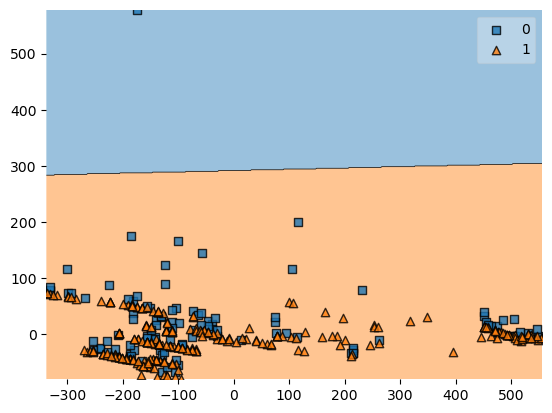

In [69]:
plot_decision_regions(x_train_new, ytt, clf=model_linear)
plt.show()

model_poly

In [74]:
model_poly.fit(x_train_new, ytt)

SVC(kernel='poly')

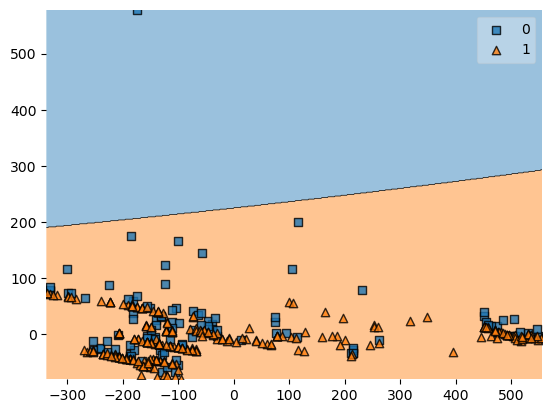

In [75]:
plot_decision_regions(x_train_new, ytt, clf=model_poly)
plt.show()

In [76]:
model_rbf.fit(x_train_new, ytt)

SVC()

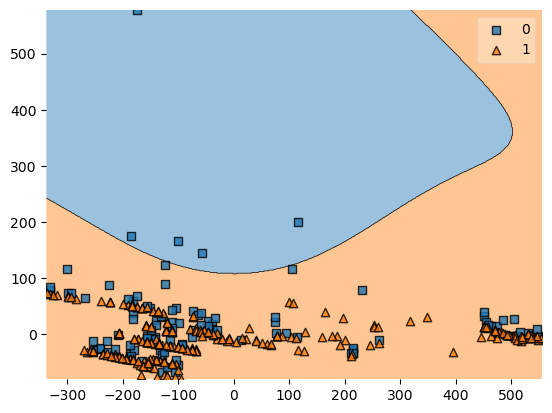

In [77]:
plot_decision_regions(x_train_new, ytt, clf=model_rbf)
plt.show()

model sigmoid

In [78]:
model_sigmoid.fit(x_train_new, ytt)

SVC(kernel='sigmoid')

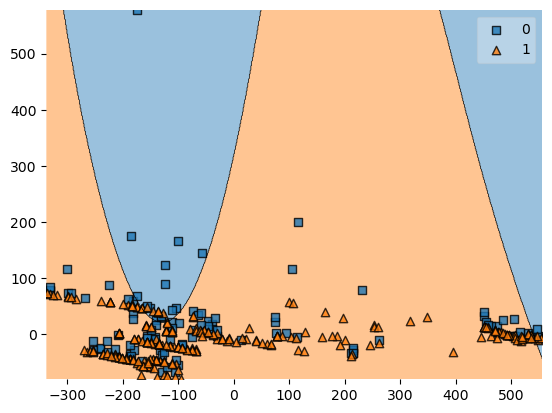

In [79]:
plot_decision_regions(x_train_new, ytt, clf=model_sigmoid)
plt.show()